# Texas Unemployment and Wages Review and Analytics 

## Import the required libraries and dependencies

In [1]:
import plotly.express as px
import pandas as pd
import os
import matplotlib
from pathlib import Path
from dotenv import load_dotenv
from matplotlib import pyplot as plt

### Prep the Mapbox API Access Token

In [2]:
# Read the Mapbox API access token from the .env file
load_dotenv()
mapbox_api_access_token = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Confirm that the mapbox_api_access_token is available
if not mapbox_api_access_token:
    print("Error with the Mapbox API access token. Check the .env file.")

Error with the Mapbox API access token. Check the .env file.


In [3]:
# Set the Mapbox API access token
px.set_mapbox_access_token(mapbox_api_access_token)

### Prepare the DataFrame

In [4]:
# Read in the US_Inflation.csv file into a DataFrame
us_Inflation_df = pd.read_csv(
    Path("../Resources/US_Inflation.csv")
).drop_duplicates()

# Review the DataFrame
display(us_Inflation_df.head())
display(us_Inflation_df.tail())


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2006,0.040,0.036,0.034,0.036,0.040,0.042,0.041,0.039,0.020,0.014,0.020,0.025
1,2007,0.021,0.024,0.028,0.026,0.027,0.027,0.023,0.019,0.028,0.036,0.044,0.041
2,2008,0.043,0.041,0.040,0.039,0.041,0.049,0.055,0.053,0.050,0.037,0.011,0.000
3,2009,-0.001,0.000,-0.004,-0.006,-0.010,-0.012,-0.020,-0.015,-0.014,-0.002,0.019,0.028
4,2010,0.026,0.022,0.023,0.022,0.020,0.011,0.013,0.012,0.011,0.012,0.011,0.014


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
11,2017,0.025,0.028,0.024,0.022,0.019,0.017,0.017,0.019,0.022,0.020,0.022,0.021
12,2018,0.021,0.022,0.024,0.025,0.028,0.028,0.029,0.027,0.023,0.025,0.022,0.019
13,2019,0.015,0.015,0.019,0.020,0.018,0.017,0.018,0.017,0.017,0.018,0.020,0.023
14,2020,0.025,0.023,0.015,0.003,0.002,0.007,0.010,0.013,0.014,0.012,0.011,0.013
15,2021,0.014,0.017,0.026,0.042,0.049,0.053,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Read in the Texas_Unemployment_Rate_by_area.csv file into a DataFrame
unemployment_Rate_df = pd.read_csv(
    Path("../Resources/Texas_Unemployment_Rate_by_area.csv")
).drop_duplicates()

# Review the DataFrame
display(unemployment_Rate_df.head())
display(unemployment_Rate_df.tail())

,Year,Period,Area,Area Type,Adjustment,Employment,Civilian Labor Force,Unemployment,Unemployment_Rate,Unnamed: 9,Unnamed: 10
0,2006,Annual,Texas,Texas,Not Adjusted,"10,770,786","11,335,112","564,326",0.050,NaN,NaN
1,2006,January,Texas,Texas,Not Adjusted,"10,575,831","11,169,955","594,124",0.053,NaN,NaN
2,2006,January,Texas,Texas,Adjusted,"10,647,444","11,240,453","593,009",0.053,NaN,NaN
3,2006,February,Texas,Texas,Not Adjusted,"10,620,818","11,224,932","604,114",0.054,NaN,NaN
4,2006,February,Texas,Texas,Adjusted,"10,664,814","11,253,367","588,553",0.052,NaN,NaN


,Year,Period,Area,Area Type,Adjustment,Employment,Civilian Labor Force,Unemployment,Unemployment_Rate,Unnamed: 9,Unnamed: 10
57064,2021,February,Zavala ...,County,Not Adjusted,"2,996","3,562",566,0.159,NaN,NaN
57065,2021,March,Zavala ...,County,Not Adjusted,"3,012","3,537",525,0.148,NaN,NaN
57066,2021,April,Zavala ...,County,Not Adjusted,"2,952","3,426",474,0.138,NaN,NaN
57067,2021,May,Zavala ...,County,Not Adjusted,"2,921","3,338",417,0.125,NaN,NaN
57068,2021,June,Zavala ...,County,Not Adjusted,"2,885","3,365",480,0.143,NaN,NaN


In [6]:
# Read in the All_Sector_Employment_and_Wages_Report_by_area.csv and Finance_and_Insurance_Sector_Employment_and_Wages_Report_by_area.csv files into a DataFrame
employment_wages_df = pd.read_csv(
    Path("../Resources/All_Sector_Employment_and_Wages_Report_by_area.csv")
).drop_duplicates()
finance_employment_wages_df = pd.read_csv(
    Path("../Resources/Finance_and_Insurance_Sector_Employment_and_Wages_Report_by_area.csv")
).drop_duplicates()

# Review the DataFrame
display(employment_wages_df.head())
display(employment_wages_df.tail())
display(finance_employment_wages_df.head())
display(finance_employment_wages_df.tail())

,Year,Period,Area,Ownership,Industry Code,Industry,Level,Establishments,Firms,Average Employment,Average Weekly Wage,Total Wages,Month 1 Employment,Month 2 Employment,Month 3 Employment,Hierarchical Ordering
0,2006,1,Texas,Private,10,"Total, All Industries",0,515102.0,416752.0,8038695.0,849.0,8.875879e+10,7973395.0,8025478.0,8117211.0,1
1,2006,2,Texas,Private,10,"Total, All Industries",0,519735.0,419437.0,8218777.0,793.0,8.467633e+10,8155790.0,8212863.0,8287677.0,1
2,2006,3,Texas,Private,10,"Total, All Industries",0,524387.0,423282.0,8309962.0,792.0,8.554109e+10,8271543.0,8325079.0,8333265.0,1
3,2006,4,Texas,Private,10,"Total, All Industries",0,526555.0,424841.0,8387231.0,894.0,9.750511e+10,8324350.0,8389998.0,8447345.0,1
4,2007,1,Texas,Private,10,"Total, All Industries",0,546806.0,442863.0,8332603.0,897.0,9.721030e+10,8255788.0,8325113.0,8416907.0,1


,Year,Period,Area,Ownership,Industry Code,Industry,Level,Establishments,Firms,Average Employment,Average Weekly Wage,Total Wages,Month 1 Employment,Month 2 Employment,Month 3 Employment,Hierarchical Ordering
16904,2020,4,Galveston,Private,10,"Total, All Industries",0,6345.0,5567.0,76586.0,1053.0,1.048382e+09,76327.0,77017.0,76413.0,1
16905,2020,4,Smith,Private,10,"Total, All Industries",0,6372.0,5776.0,89568.0,1023.0,1.191598e+09,88964.0,89635.0,90106.0,1
16906,2020,4,Nueces,Private,10,"Total, All Industries",0,8199.0,6939.0,124153.0,1044.0,1.685520e+09,124108.0,124203.0,124148.0,1
16907,2020,4,Hidalgo,Private,10,"Total, All Industries",0,12674.0,10641.0,204327.0,697.0,1.852345e+09,201333.0,205430.0,206217.0,1
16908,2020,4,El Paso,Private,10,"Total, All Industries",0,15688.0,12877.0,237217.0,817.0,2.520623e+09,237609.0,236221.0,237820.0,1


,Year,Period,Area,Ownership,Industry Code,Industry,Level,Establishments,Firms,Average Employment,Average Weekly Wage,Total Wages,Month 1 Employment,Month 2 Employment,Month 3 Employment,Hierarchical Ordering
0,2006,1,Texas,Private,52,Finance and Insurance,2,32485.0,20113.0,435081.0,1350.0,7.637073e+09,432888.0,434911.0,437445.0,1775
1,2006,2,Texas,Private,52,Finance and Insurance,2,32859.0,20145.0,440936.0,1096.0,6.284960e+09,438801.0,440522.0,443485.0,1775
2,2006,3,Texas,Private,52,Finance and Insurance,2,33047.0,20205.0,444250.0,1109.0,6.407067e+09,442912.0,444664.0,445175.0,1775
3,2006,4,Texas,Private,52,Finance and Insurance,2,33309.0,20303.0,448150.0,1257.0,7.325413e+09,446255.0,447407.0,450787.0,1775
4,2007,1,Texas,Private,52,Finance and Insurance,2,34418.0,21145.0,448478.0,1515.0,8.835306e+09,446848.0,448575.0,450010.0,1775


,Year,Period,Area,Ownership,Industry Code,Industry,Level,Establishments,Firms,Average Employment,Average Weekly Wage,Total Wages,Month 1 Employment,Month 2 Employment,Month 3 Employment,Hierarchical Ordering
13703,2020,4,Bexar,Private,52,Finance and Insurance,2,2412.0,1460.0,63608.0,1838.0,1.519788e+09,63474.0,63693.0,63656.0,1775
13704,2020,4,Travis,Private,52,Finance and Insurance,2,2633.0,1823.0,37022.0,2710.0,1.304277e+09,36710.0,36999.0,37356.0,1775
13705,2020,4,Tarrant,Private,52,Finance and Insurance,2,3056.0,2006.0,47534.0,1968.0,1.215795e+09,47391.0,47630.0,47580.0,1775
13706,2020,4,Dallas,Private,52,Finance and Insurance,2,5419.0,3677.0,116937.0,2340.0,3.556651e+09,116633.0,116908.0,117270.0,1775
13707,2020,4,Harris,Private,52,Finance and Insurance,2,6789.0,4303.0,77575.0,2502.0,2.523502e+09,77366.0,77656.0,77704.0,1775


### Finance Sector vs. Total Industry Analysis

In [7]:
# Merge employment and wages data
all_employment_wages_df = pd.merge(employment_wages_df,finance_employment_wages_df, on=["Year", "Period", "Area"])

# Drop column Ownership, Industry Code, Industry from dataframe
all_employment_wages_df = all_employment_wages_df.drop(columns=['Industry_x', 'Industry Code_x', 'Level_x',
                                    'Month 1 Employment_x', 'Month 2 Employment_x', 'Month 3 Employment_x',
                                    'Hierarchical Ordering_x', 'Total Wages_x', 'Ownership_x', 'Industry Code_y', 
                                    'Industry_y', 'Level_y','Month 1 Employment_y','Month 2 Employment_y',
                                    'Month 3 Employment_y','Hierarchical Ordering_y', 'Total Wages_y', 'Ownership_y'])

# Rename columns
all_employment_wages_df = all_employment_wages_df.rename(columns={'Establishments_x': 'Total Establishments',
                                   'Firms_x': 'Total Firms',
                                   'Average Employment_x': 'Total Average Employment',
                                   'Average Weekly Wage_x': 'Total Average Weekly Wage',
                                   'Establishments_y': 'Finance Establishments',
                                   'Firms_y': 'Finance Firms',
                                   'Average Employment_y': 'Finance Average Employment',
                                   'Average Weekly Wage_y': 'Finance Average Weekly Wage'
                                   })

# Create Quarter, Annual wage, and Finance % of Total column
all_employment_wages_df['Quarter'] = all_employment_wages_df['Year'].astype (str) + 'q' + all_employment_wages_df['Period'].astype (str)
all_employment_wages_df['Total Annual Wage'] = all_employment_wages_df.apply(lambda row: row['Total Average Weekly Wage'] * 52, axis=1)
all_employment_wages_df['Finance Annual Wage'] = all_employment_wages_df.apply(lambda row: row['Finance Average Weekly Wage'] * 52, axis=1)
all_employment_wages_df['Firms % of Total'] = all_employment_wages_df.apply(lambda row: row['Finance Firms'] / row['Total Firms'], axis=1)
all_employment_wages_df['Employment % of Total'] = all_employment_wages_df.apply(lambda row: row['Finance Average Employment'] / row['Total Average Employment'], axis=1)
all_employment_wages_df['Establishments % of Total'] = all_employment_wages_df.apply(lambda row: row['Finance Establishments'] / row['Total Establishments'], axis=1)

# Review the DataFrame
display(all_employment_wages_df.head())
display(all_employment_wages_df.tail())

,Year,Period,Area,Total Establishments,Total Firms,Total Average Employment,Total Average Weekly Wage,Finance Establishments,Finance Firms,Finance Average Employment,Finance Average Weekly Wage,Quarter,Total Annual Wage,Finance Annual Wage,Firms % of Total,Employment % of Total,Establishments % of Total
0,2006,1,Texas,515102.0,416752.0,8038695.0,849.0,32485.0,20113.0,435081.0,1350.0,2006q1,44148.0,70200.0,0.048261,0.054123,0.063065
1,2006,2,Texas,519735.0,419437.0,8218777.0,793.0,32859.0,20145.0,440936.0,1096.0,2006q2,41236.0,56992.0,0.048029,0.053650,0.063223
2,2006,3,Texas,524387.0,423282.0,8309962.0,792.0,33047.0,20205.0,444250.0,1109.0,2006q3,41184.0,57668.0,0.047734,0.053460,0.063020
3,2006,4,Texas,526555.0,424841.0,8387231.0,894.0,33309.0,20303.0,448150.0,1257.0,2006q4,46488.0,65364.0,0.047790,0.053432,0.063258
4,2007,1,Texas,546806.0,442863.0,8332603.0,897.0,34418.0,21145.0,448478.0,1515.0,2007q1,46644.0,78780.0,0.047746,0.053822,0.062944


,Year,Period,Area,Total Establishments,Total Firms,Total Average Employment,Total Average Weekly Wage,Finance Establishments,Finance Firms,Finance Average Employment,Finance Average Weekly Wage,Quarter,Total Annual Wage,Finance Annual Wage,Firms % of Total,Employment % of Total,Establishments % of Total
13696,2020,4,Galveston,6345.0,5567.0,76586.0,1053.0,401.0,257.0,4564.0,1504.0,2020q4,54756.0,78208.0,0.046165,0.059593,0.063199
13697,2020,4,Smith,6372.0,5776.0,89568.0,1023.0,485.0,366.0,3035.0,1471.0,2020q4,53196.0,76492.0,0.063366,0.033885,0.076114
13698,2020,4,Nueces,8199.0,6939.0,124153.0,1044.0,541.0,346.0,4257.0,1377.0,2020q4,54288.0,71604.0,0.049863,0.034288,0.065984
13699,2020,4,Hidalgo,12674.0,10641.0,204327.0,697.0,861.0,510.0,6460.0,1109.0,2020q4,36244.0,57668.0,0.047928,0.031616,0.067934
13700,2020,4,El Paso,15688.0,12877.0,237217.0,817.0,947.0,610.0,7831.0,1276.0,2020q4,42484.0,66352.0,0.047371,0.033012,0.060365


Text(0.5, 1.0, 'Average Annual Wage in Finance sector vs. Total Industry')

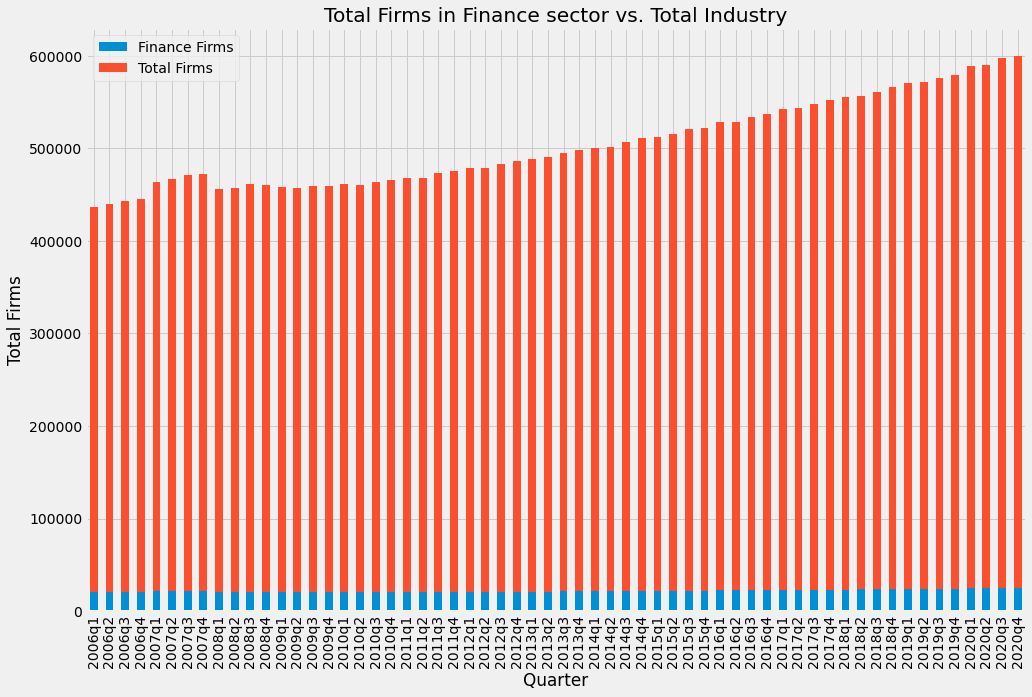

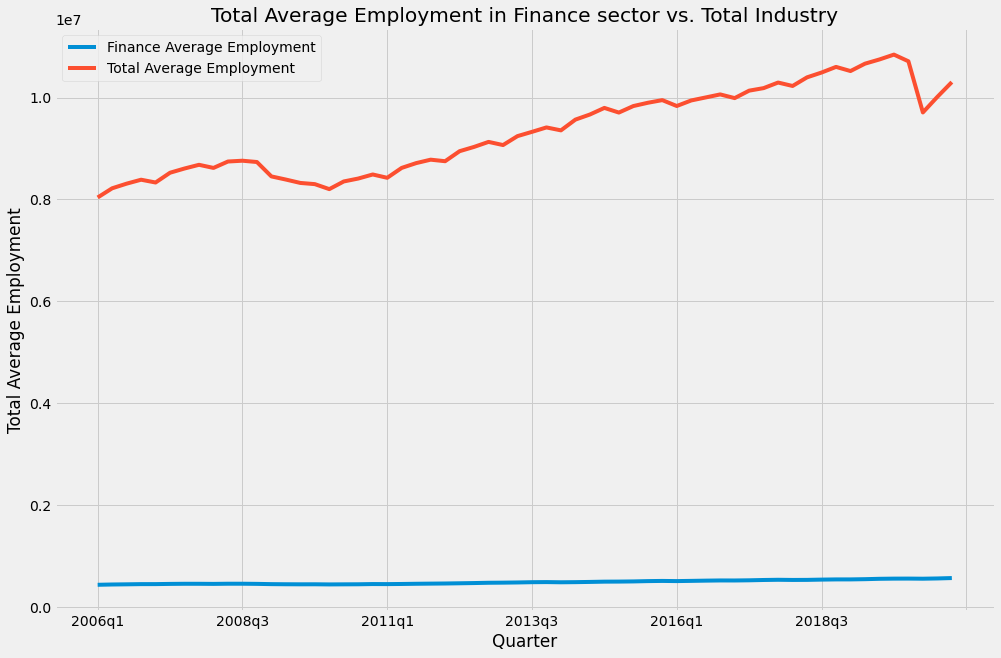

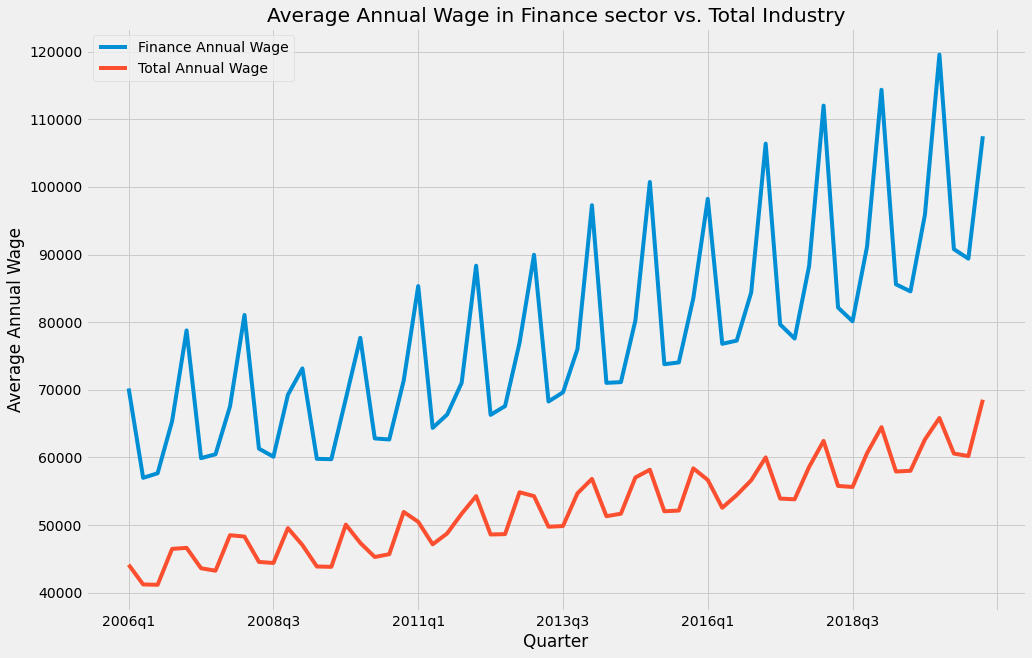

In [11]:
# Filter the DataFrame to include only Texas state data and create Texas Finance Sector employment dataframe
tx_employment_df = all_employment_wages_df[(all_employment_wages_df["Area"] == "Texas")]
tx_total_firms_plot = tx_employment_df[["Quarter", "Finance Firms", "Total Firms"]]
tx_total_employment_plot = tx_employment_df[["Quarter", "Finance Average Employment", "Total Average Employment"]]
tx_total_wage_plot = tx_employment_df[["Quarter", "Finance Annual Wage", "Total Annual Wage"]]

# Plot line chart for comparison of Finance Sector vs. Total Industry
matplotlib.style.use('fivethirtyeight')
tx_total_firms_plot.plot(figsize=(15, 10), kind="bar", stacked=True, x="Quarter") 
plt.xlabel("Quarter")
plt.ylabel("Total Firms") 
plt.title("Total Firms in Finance sector vs. Total Industry")

tx_total_employment_plot.plot(figsize=(15, 10), x="Quarter") 
plt.xlabel("Quarter")
plt.ylabel("Total Average Employment") 
plt.title("Total Average Employment in Finance sector vs. Total Industry")

tx_total_wage_plot.plot(figsize=(15, 10), x="Quarter") 
plt.xlabel("Quarter")
plt.ylabel("Average Annual Wage")
plt.title("Average Annual Wage in Finance sector vs. Total Industry")